<a href="https://colab.research.google.com/github/momoenomoto/ML-final-project/blob/main/Data_Analysis_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [33]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [34]:
data = pd.read_csv("/content/gdrive/MyDrive/all_data_no_duplicates_equal_size.csv")

In [ ]:
data.head(10)

,song_id,mfcc_a_0,mfcc_a_1,mfcc_a_2,mfcc_a_3,mfcc_a_4,mfcc_a_5,mfcc_a_6,mfcc_a_7,mfcc_a_8,...,onset_a,onset_std,bpm,rmseP_skew,rmseP_kurtosis,rmseH_skew,rmseH_kurtosis,beats_a,beats_std,genre
0,17bf8d5f74d4e53a3f918263da27600ba0e555b5,-131.34530,154.44778,-46.625813,55.491830,-2.969374,28.455832,-11.929317,9.539672,4.456010,...,1.541892,1.521225,132.512019,1.070878,1.396955,0.741772,1.111939,14.542479,8.524608,blues
1,80822cc306bcf4d6ce727ed9b185382183590feb,-216.48515,159.88239,-53.843456,41.647510,4.802261,6.194261,-0.619864,1.253317,5.258920,...,1.589639,1.765213,117.453835,1.569087,2.719492,0.010281,-0.229946,14.460827,8.436646,blues
2,fe86aae90064f43dd3c9ccc2271fd3570ea8d530,-97.64007,137.78816,-43.407673,57.867115,-17.740084,48.168274,-20.405445,14.013074,-11.915717,...,1.332900,0.778537,123.046875,1.270062,1.725401,0.076682,-0.120848,14.568310,8.531551,blues
3,8a36fef7cc58e415b09f472062d529ad75f6888a,-218.33733,139.85650,-46.182710,29.928583,-5.652246,26.629574,-6.704617,15.074043,0.800906,...,1.527841,1.310864,132.512019,1.251199,1.432018,1.522334,2.031958,14.527072,8.542730,blues
4,6a90012a2f47eb44abcaf1641683f86425713e40,-137.82199,145.93646,-52.225964,44.550194,-5.257767,24.834461,-7.554444,12.882658,4.022466,...,1.525155,1.458287,89.102909,2.108472,5.425519,0.541542,1.362728,14.487932,8.556227,blues
5,427f1bf0d0b14f5dcd3edbb3561e24493b8e338d,-136.25974,172.59949,-38.454110,51.471230,-9.210611,23.187613,-2.800377,9.361017,-1.316823,...,1.421514,1.143405,139.674831,1.663935,4.127868,0.467440,0.326743,14.549489,8.532701,blues
6,be043e8f0faaea0d4cfa36b14172b6b30a57c398,-186.63614,175.44250,-38.024853,33.556710,10.110077,12.562787,9.992175,7.003207,16.348728,...,1.434051,1.844193,109.956782,1.622965,2.501570,0.238919,-0.085705,14.816340,8.183992,blues
7,1c09c4a26866ef28e507aa280cd51a719b035ea6,-151.80618,175.59180,-25.405882,32.177900,5.982085,24.986546,-1.543303,9.279480,4.102045,...,1.474009,1.294586,126.048018,1.425889,2.202716,0.897709,0.864059,14.473772,8.554240,blues
8,13655dd5eb8caad647021ca74417f71db23b7780,-105.62864,198.75179,-61.418823,29.890055,2.061370,6.838061,-3.562858,1.008359,4.786649,...,1.468327,1.506442,117.453835,1.209135,1.543631,-0.525107,0.437820,14.434257,8.462482,blues
9,4cfb55a2ddbd24a5538f21588a85fa5727025aa7,-244.07864,176.26709,-59.649230,23.343456,-6.413820,11.967070,-11.608889,-1.186092,3.141831,...,1.540191,1.977420,117.453835,1.481484,2.041936,-0.350467,-0.632589,14.507312,8.356724,blues


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 81 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   song_id         880 non-null    object 
 1   mfcc_a_0        880 non-null    float64
 2   mfcc_a_1        880 non-null    float64
 3   mfcc_a_2        880 non-null    float64
 4   mfcc_a_3        880 non-null    float64
 5   mfcc_a_4        880 non-null    float64
 6   mfcc_a_5        880 non-null    float64
 7   mfcc_a_6        880 non-null    float64
 8   mfcc_a_7        880 non-null    float64
 9   mfcc_a_8        880 non-null    float64
 10  mfcc_a_9        880 non-null    float64
 11  mfcc_a_10       880 non-null    float64
 12  mfcc_a_11       880 non-null    float64
 13  mfcc_a_12       880 non-null    float64
 14  mfcc_std_0      880 non-null    float64
 15  mfcc_std_1      880 non-null    float64
 16  mfcc_std_2      880 non-null    float64
 17  mfcc_std_3      880 non-null    flo

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data["genre"] = le.fit_transform(data["genre"])
data.head()

,song_id,mfcc_a_0,mfcc_a_1,mfcc_a_2,mfcc_a_3,mfcc_a_4,mfcc_a_5,mfcc_a_6,mfcc_a_7,mfcc_a_8,...,onset_a,onset_std,bpm,rmseP_skew,rmseP_kurtosis,rmseH_skew,rmseH_kurtosis,beats_a,beats_std,genre
0,17bf8d5f74d4e53a3f918263da27600ba0e555b5,-131.34530,154.44778,-46.625813,55.491830,-2.969374,28.455832,-11.929317,9.539672,4.456010,...,1.541892,1.521225,132.512019,1.070878,1.396955,0.741772,1.111939,14.542479,8.524608,0
1,80822cc306bcf4d6ce727ed9b185382183590feb,-216.48515,159.88239,-53.843456,41.647510,4.802261,6.194261,-0.619864,1.253317,5.258920,...,1.589639,1.765213,117.453835,1.569087,2.719492,0.010281,-0.229946,14.460827,8.436646,0
2,fe86aae90064f43dd3c9ccc2271fd3570ea8d530,-97.64007,137.78816,-43.407673,57.867115,-17.740084,48.168274,-20.405445,14.013074,-11.915717,...,1.332900,0.778537,123.046875,1.270062,1.725401,0.076682,-0.120848,14.568310,8.531551,0
3,8a36fef7cc58e415b09f472062d529ad75f6888a,-218.33733,139.85650,-46.182710,29.928583,-5.652246,26.629574,-6.704617,15.074043,0.800906,...,1.527841,1.310864,132.512019,1.251199,1.432018,1.522334,2.031958,14.527072,8.542730,0
4,6a90012a2f47eb44abcaf1641683f86425713e40,-137.82199,145.93646,-52.225964,44.550194,-5.257767,24.834461,-7.554444,12.882658,4.022466,...,1.525155,1.458287,89.102909,2.108472,5.425519,0.541542,1.362728,14.487932,8.556227,0


In [35]:
X = data.iloc[:,1:80]

In [36]:
y = data.iloc[:,80]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain, see Mathematical formulation.

splitter{“best”, “random”}, default=”best”
The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

max_depthint, default=None
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

min_samples_split：int or float, default=2
The minimum number of samples required to split an internal node

min_samples_leafint or float, default=1
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression

min_weight_fraction_leaffloat, default=0.0
The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

max_featuresint, float or {“auto”, “sqrt”, “log2”}, default=None
The number of features to consider when looking for the best split:

If int, then consider max_features features at each split.
If float, then max_features is a fraction and max(1, int(max_features * n_features_in_)) features are considered at each split.
If “auto”, then max_features=sqrt(n_features).
If “sqrt”, then max_features=sqrt(n_features).
If “log2”, then max_features=log2(n_features).
If None, then max_features=n_features.

random_stateint, RandomState instance or None, default=None
Controls the randomness of the estimator. The features are always randomly permuted at each split, even if splitter is set to "best". When max_features < n_features, the algorithm will select max_features at random at each split before finding the best split among them. But the best found split may vary across different runs, even if max_features=n_features. That is the case, if the improvement of the criterion is identical for several splits and one split has to be selected at random. To obtain a deterministic behaviour during fitting, random_state has to be fixed to an integer. See Glossary for details.

max_leaf_nodesint, default=None
Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

min_impurity_decreasefloat, default=0.0
A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

class_weightdict, list of dict or “balanced”, default=None
Weights associated with classes in the form {class_label: weight}. If None, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.

ccp_alphanon-negative float, default=0.0
Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. By default, no pruning is performed. See Minimal Cost-Complexity Pruning for details.

Decision Tree Classifier (Hyperparameter Tuning)

In [8]:
dtc = DecisionTreeClassifier()

In [9]:
params_dtc = {'max_depth':[6,7,8,9,10],
        'min_samples_leaf':[1,2,3,4,5],
        'ccp_alpha' : [0.001,0.005,0.01,0.05,0.1]}
grid_dtc = GridSearchCV(estimator = dtc,
             param_grid = params_dtc,
             scoring = 'accuracy',
             cv = 5,
             n_jobs = -1)
grid_dtc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.001, 0.005, 0.01, 0.05, 0.1],
                         'max_depth': [6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [10]:
best_model = grid_dtc.best_estimator_
best_param = grid_dtc.best_params_
print("best paramers for decision tree: ", best_param)
print("best accuracy score for decision tree is: {:.3f}".format(grid_dtc.best_score_))

y_pred = best_model.predict(X_test)

# Compute test_accuracy
test_accu = accuracy_score(y_test, y_pred)

# Print test_roc_auc
print('Test set accuracy score for decision tree: {:.3f}'.format(test_accu))

best paramers for decision tree:  {'ccp_alpha': 0.01, 'max_depth': 7, 'min_samples_leaf': 2}
best accuracy score for decision tree is: 0.559
Test set accuracy score for decision tree: 0.477


Decision Tree Classifier: Bagging Applied

In [12]:
from sklearn.ensemble import BaggingClassifier

def bagging_dtc(num_trees):
  dtc = DecisionTreeClassifier(min_samples_leaf=2, max_depth=7, ccp_alpha=0.01)
  dtc_bagging = BaggingClassifier(estimator=dtc,
                  n_estimators=num_trees,
                  oob_score=True,
                  random_state=1)
  dtc_bagging.fit(X_train, y_train)
  y_pred = dtc_bagging.predict(X_test)
  acc_test = accuracy_score(y_pred, y_test)
  acc_oob = dtc_bagging.oob_score_
  return acc_test, acc_oob
  
l = [50,100,150,200,250,300]
for num in l:
  acc_test, acc_oob = bagging_dtc(num)
  print("Number of Trees = ",num, ": ", 'Test set accuracy for Decision Tree Classifier (Bagging): {:.3f}, OOB accuracy for Decision Tree Classifier (Bagging): {:.3f}'.format(acc_test, acc_oob))

Number of Trees =  50 :  Test set accuracy for Decision Tree Classifier (Bagging): 0.599, OOB accuracy for Decision Tree Classifier (Bagging): 0.617
Number of Trees =  100 :  Test set accuracy for Decision Tree Classifier (Bagging): 0.588, OOB accuracy for Decision Tree Classifier (Bagging): 0.623
Number of Trees =  150 :  Test set accuracy for Decision Tree Classifier (Bagging): 0.588, OOB accuracy for Decision Tree Classifier (Bagging): 0.638
Number of Trees =  200 :  Test set accuracy for Decision Tree Classifier (Bagging): 0.588, OOB accuracy for Decision Tree Classifier (Bagging): 0.634
Number of Trees =  250 :  Test set accuracy for Decision Tree Classifier (Bagging): 0.591, OOB accuracy for Decision Tree Classifier (Bagging): 0.638
Number of Trees =  300 :  Test set accuracy for Decision Tree Classifier (Bagging): 0.580, OOB accuracy for Decision Tree Classifier (Bagging): 0.634


Decision Tree Classifier: Boosting Applied

Adaboost

In [13]:
from sklearn.ensemble import AdaBoostClassifier

# Instantiate dt
def adaboost_dtc(num_trees):
  dtc = DecisionTreeClassifier(min_samples_leaf=2, max_depth=7, ccp_alpha=0.01)  #using the parameters derived from the pure decision tree classifier

  # Instantiate ada
  dtc_ada = AdaBoostClassifier(estimator=dtc, n_estimators=100, random_state=1)  #tune n_estimators from 150 to 200 increases the accuracy
  dtc_ada.fit(X_train, y_train)
  train_accu = dtc_ada.score(X_train, y_train)

  y_pred = dtc_ada.predict(X_test)
  test_accu = accuracy_score(y_pred,y_test)
  return train_accu, test_accu

for num in l:
  train_accu, test_accu = adaboost_dtc(num)
  print('Number of Trees = ', num, ': ', 'Train set accuracy for Decision Tree Classifier (Adaboost): {:.3f}, Test set accuracy: {:.3f}'.format(train_accu, test_accu))

Number of Trees =  50 :  Train set accuracy for Decision Tree Classifier (Adaboost): 0.979, Test set accuracy: 0.642
Number of Trees =  100 :  Train set accuracy for Decision Tree Classifier (Adaboost): 0.979, Test set accuracy: 0.642
Number of Trees =  150 :  Train set accuracy for Decision Tree Classifier (Adaboost): 0.979, Test set accuracy: 0.642
Number of Trees =  200 :  Train set accuracy for Decision Tree Classifier (Adaboost): 0.979, Test set accuracy: 0.642
Number of Trees =  250 :  Train set accuracy for Decision Tree Classifier (Adaboost): 0.979, Test set accuracy: 0.642
Number of Trees =  300 :  Train set accuracy for Decision Tree Classifier (Adaboost): 0.979, Test set accuracy: 0.642


Gradient Boosting

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate gb
gb = GradientBoostingClassifier(learning_rate = 0.1)

# Apply GridSearchCV
params_gb = {'learning_rate': [0.01,0.05,0.1,0.15],
        'n_estimators':[50,100,150,200],
        'max_depth': [4,6,8,10]}  #from 0.01,0.05,0.1, learning rate = 0.1 yields a best result
grid_gb = GridSearchCV(estimator = gb,
             param_grid = params_gb,
             scoring = 'accuracy',
             cv = 5,
             n_jobs = -1)
grid_gb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.15],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [15]:
best_model = grid_gb.best_estimator_
best_param = grid_gb.best_params_
print("best paramers of decision tree (gradient boosting): ", best_param)
print("best accuracy score for decision tree (gradient boosting) is: {:.3f}".format(grid_gb.best_score_))

y_pred = best_model.predict(X_test)
test_accu = accuracy_score(y_test, y_pred)
print('Test set accuracy score for decision tree (gradient boosting): {:.3f}'.format(test_accu))

best paramers of decision tree (gradient boosting):  {'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 150}
best accuracy score for decision tree (gradient boosting) is: 0.687
Test set accuracy score for decision tree (gradient boosting): 0.639


Random Forest

In [16]:
rf = RandomForestClassifier(criterion = "gini",max_features = "sqrt")
params_rf = {'n_estimators': [25,50,100,150,200],
        'max_depth':[6,7,8,9,10],
        'min_samples_leaf':[1,2,3,4,5]}
grid_rf = GridSearchCV(estimator = rf,
             param_grid = params_rf,
             scoring = 'accuracy',
             cv = 5,
             n_jobs = -1)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'n_estimators': [25, 50, 100, 150, 200]},
             scoring='accuracy')

In [17]:
best_model = grid_rf.best_estimator_
best_param = grid_rf.best_params_
print("best paramers of random forest: ", best_param)
print("best accuracy score of random forest is: {:.3f}".format(grid_rf.best_score_))

y_pred = best_model.predict(X_test)

# Compute test_accuracy
test_accu = accuracy_score(y_test, y_pred)

# Print test_roc_auc
print('Test set accuracy score for random forest: {:.3f}'.format(test_accu))

best paramers of random forest:  {'max_depth': 8, 'min_samples_leaf': 4, 'n_estimators': 100}
best accuracy score of random forest is: 0.684
Test set accuracy score for random forest: 0.639


Fine tune hyperparameters again

In [18]:
rf2 = RandomForestClassifier(criterion = "gini", max_features = "sqrt")
params_rf2 = {'min_samples_leaf':[1,2,3,4,5],
        'n_estimators': [200,250,300],
        'max_depth':[10,15,20]}
grid_rf2 = GridSearchCV(estimator = rf2,
             param_grid = params_rf2,
             scoring = 'accuracy',
             cv = 5,
             n_jobs = -1)
grid_rf2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'n_estimators': [200, 250, 300]},
             scoring='accuracy')

In [19]:
best_model = grid_rf2.best_estimator_
best_param = grid_rf2.best_params_
print("best paramers of random forest(2): ", best_param)
print("best accuracy score of random forest(2) is: {:.3f}".format(grid_rf2.best_score_))

y_pred = best_model.predict(X_test)

# Compute test_accuracy
test_accu = accuracy_score(y_test, y_pred)

# Print test_roc_auc
print('Test set accuracy score for random forest(2): {:.3f}'.format(test_accu))

best paramers of random forest(2):  {'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 250}
best accuracy score of random forest(2) is: 0.689
Test set accuracy score for random forest(2): 0.648


Compare the first and second random forest, the second one performs slightly better.

In [38]:
rf_best = RandomForestClassifier(n_estimators=250, min_samples_leaf=1, max_depth=15, criterion="gini", max_features="sqrt")
rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_test)
train_accu = rf_best.score(X_train,y_train)
test_accu = accuracy_score(y_test, y_pred)
print('Train set accuracy score for best random forest: {:.3f}, Test set accuracy score: {:.3f}'.format(train_accu,test_accu))

Train set accuracy score for best random forest: 1.000, Test set accuracy score: 0.636


In [39]:
rf_best.feature_importances_

array([0.02113667, 0.00832561, 0.02541394, 0.00810088, 0.01056386,
       0.00752325, 0.01129059, 0.01191906, 0.00984378, 0.00717691,
       0.00854399, 0.00964115, 0.0085773 , 0.00773066, 0.00596079,
       0.00957004, 0.00718871, 0.01259972, 0.00913706, 0.00723644,
       0.00798139, 0.00635807, 0.00763094, 0.01014703, 0.01259403,
       0.01963099, 0.00650884, 0.00721782, 0.00634807, 0.00691304,
       0.00873426, 0.00847461, 0.00985089, 0.00829778, 0.00849835,
       0.00692699, 0.00639696, 0.00564294, 0.00816972, 0.00697438,
       0.00710561, 0.00645471, 0.00907655, 0.0072389 , 0.00643712,
       0.0075097 , 0.00776068, 0.00694963, 0.00718487, 0.00784168,
       0.01985969, 0.02095432, 0.0317516 , 0.03002642, 0.04102942,
       0.04447345, 0.02408738, 0.0317054 , 0.01684055, 0.02542813,
       0.01915292, 0.01079236, 0.01341087, 0.01970197, 0.02469695,
       0.01009382, 0.00508763, 0.01319383, 0.02175161, 0.0239617 ,
       0.03130571, 0.02127384, 0.00797618, 0.00701918, 0.00722

In [40]:
feature_scores = pd.Series(rf_best.feature_importances_, index=X_train.columns).sort_values(ascending=False)
display(feature_scores)

rmseP_std      0.044473
rmseP_a        0.041029
melspect_a     0.031752
rmseH_std      0.031705
onset_a        0.031306
                 ...   
chroma_a_2     0.006348
mfcc_std_1     0.005961
rmseH_skew     0.005874
chroma_a_11    0.005643
tonnetz_a      0.005088
Length: 79, dtype: float64

In [25]:
type(feature_scores)

pandas.core.series.Series

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

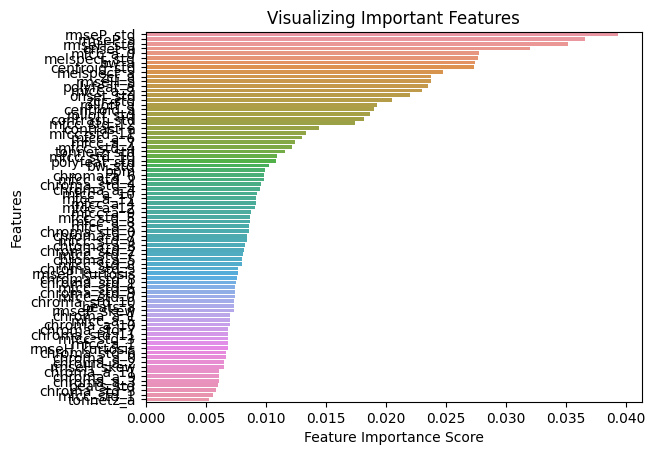

In [27]:
sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")

# Visualize the graph
plt.show()

Drop features based on feature importance (delete features with importance < 0.005)

In [ ]:
X.head()

,mfcc_a_0,mfcc_a_1,mfcc_a_2,mfcc_a_3,mfcc_a_4,mfcc_a_5,mfcc_a_6,mfcc_a_7,mfcc_a_8,mfcc_a_9,...,zcr_std,onset_a,onset_std,bpm,rmseP_skew,rmseP_kurtosis,rmseH_skew,rmseH_kurtosis,beats_a,beats_std
0,-131.34530,154.44778,-46.625813,55.491830,-2.969374,28.455832,-11.929317,9.539672,4.456010,9.052435,...,0.019586,1.541892,1.521225,132.512019,1.070878,1.396955,0.741772,1.111939,14.542479,8.524608
1,-216.48515,159.88239,-53.843456,41.647510,4.802261,6.194261,-0.619864,1.253317,5.258920,9.118914,...,0.022674,1.589639,1.765213,117.453835,1.569087,2.719492,0.010281,-0.229946,14.460827,8.436646
2,-97.64007,137.78816,-43.407673,57.867115,-17.740084,48.168274,-20.405445,14.013074,-11.915717,13.601735,...,0.021188,1.332900,0.778537,123.046875,1.270062,1.725401,0.076682,-0.120848,14.568310,8.531551
3,-218.33733,139.85650,-46.182710,29.928583,-5.652246,26.629574,-6.704617,15.074043,0.800906,0.926584,...,0.025217,1.527841,1.310864,132.512019,1.251199,1.432018,1.522334,2.031958,14.527072,8.542730
4,-137.82199,145.93646,-52.225964,44.550194,-5.257767,24.834461,-7.554444,12.882658,4.022466,11.714938,...,0.031764,1.525155,1.458287,89.102909,2.108472,5.425519,0.541542,1.362728,14.487932,8.556227


In [28]:
print(feature_scores[feature_scores<0.005])

Series([], dtype: float64)


In [29]:
feature_drop1 = ["chroma_a_9","chroma_a_10","chroma_a_11","tonnetz_a"]
X_drop1 = X.drop(feature_drop1, axis=1)
X_train_drop1, X_test_drop1, y_train, y_test = train_test_split(X_drop1, y, test_size=0.33, random_state=42)
rf_best_drop1 = RandomForestClassifier(n_estimators=200, min_samples_leaf=2, max_depth=10, criterion="gini", max_features="sqrt")
rf_best_drop1.fit(X_train_drop1, y_train)
y_pred_drop1 = rf_best_drop1.predict(X_test_drop1)
train_accu = rf_best_drop1.score(X_train_drop1,y_train)
test_accu = accuracy_score(y_test, y_pred_drop1)
print('Training accuracy score for best random forest (drop features < 0.005): {:.3f}, Test set accuracy: {:.3f}'.format(train_accu, test_accu))

Training accuracy score for best random forest (drop features < 0.005): 1.000, Test set accuracy: 0.629


In [53]:
print(feature_scores[feature_scores<0.0075].index.to_list())

['beats_a', 'chroma_std_5', 'mfcc_std_6', 'rmseP_kurtosis', 'chroma_a_1', 'mfcc_std_3', 'chroma_std_10', 'mfcc_a_9', 'rmseH_kurtosis', 'chroma_std_2', 'rmseP_skew', 'chroma_std_1', 'chroma_std_9', 'chroma_a_9', 'chroma_a_3', 'beats_std', 'chroma_a_0', 'chroma_std_3', 'chroma_std_6', 'chroma_a_10', 'mfcc_std_8', 'chroma_a_2', 'mfcc_std_1', 'rmseH_skew', 'chroma_a_11', 'tonnetz_a']


In [42]:
train_accu_lst = []
val_accu_lst = []
test_accu_lst = []
for threshold in np.arange(0.005, 0.02, 0.0005):
  drop_features = feature_scores[feature_scores<threshold].index.tolist()
  X_drop = X.drop(drop_features, axis=1)
  X_train_drop, X_test_drop, y_train, y_test = train_test_split(X_drop, y, test_size=0.4, random_state=42)
  rf_drop = RandomForestClassifier(criterion="gini", max_features="sqrt")

  #GridSearchCV
  params_rf_drop = {'n_estimators':[25,50,100,150,200],
          'max_depth': [4,6,8,10,12,14],
          'min_samples_leaf': [1,2,3,4]}
  grid_rf_drop = GridSearchCV(estimator = rf_drop,
             param_grid = params_rf_drop,
             scoring = 'accuracy',
             cv = 5,
             n_jobs = -1)
  grid_rf_drop.fit(X_train_drop, y_train)

  best_model = grid_rf_drop.best_estimator_
  best_param = grid_rf_drop.best_params_
  val_accu = grid_rf_drop.best_score_
  train_accu = best_model.score(X_train_drop,y_train)
  y_pred = best_model.predict(X_test_drop)
  test_accu = accuracy_score(y_test, y_pred)

  train_accu_lst.append(train_accu)
  val_accu_lst.append(val_accu)
  test_accu_lst.append(test_accu)

  print("When threshold is: {:.4f}, the training accuracy is: {:.4f}, the validation accuracy is: {:.4f}, the testing accuracy is: {:.3f}".format(threshold, train_accu, val_accu, test_accu), "Best parameters are: ", best_param)

When threshold is: 0.0050, the training accuracy is: 0.9886, the validation accuracy is: 0.6874, the testing accuracy is: 0.642 Best parameters are:  {'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 200}
When threshold is: 0.0055, the training accuracy is: 0.9905, the validation accuracy is: 0.6912, the testing accuracy is: 0.648 Best parameters are:  {'max_depth': 14, 'min_samples_leaf': 3, 'n_estimators': 200}
When threshold is: 0.0060, the training accuracy is: 1.0000, the validation accuracy is: 0.6893, the testing accuracy is: 0.636 Best parameters are:  {'max_depth': 12, 'min_samples_leaf': 2, 'n_estimators': 150}
When threshold is: 0.0065, the training accuracy is: 1.0000, the validation accuracy is: 0.6911, the testing accuracy is: 0.645 Best parameters are:  {'max_depth': 14, 'min_samples_leaf': 2, 'n_estimators': 200}
When threshold is: 0.0070, the training accuracy is: 1.0000, the validation accuracy is: 0.6911, the testing accuracy is: 0.634 Best parameters are:  {'

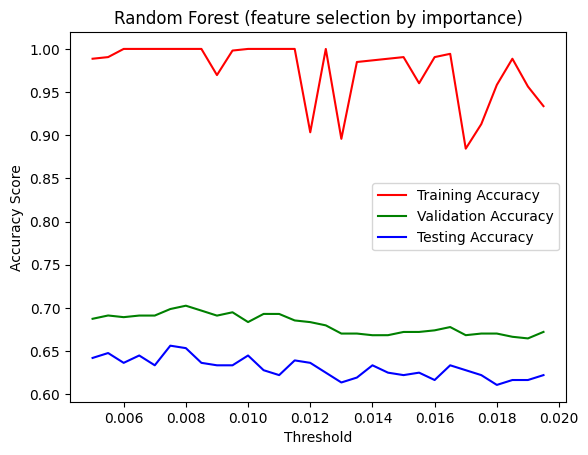

In [43]:
threshold_lst = [i for i in np.arange(0.005, 0.02, 0.0005)]
plt.plot(threshold_lst, train_accu_lst, c="red", label="Training Accuracy")
plt.plot(threshold_lst, val_accu_lst, c="green", label="Validation Accuracy")
plt.plot(threshold_lst,test_accu_lst, c="blue", label="Testing Accuracy")
plt.xlabel('Threshold')
plt.ylabel('Accuracy Score')
plt.title("Random Forest (feature selection by importance)")
plt.legend()
plt.show()

When threshold is: 0.0075, the training accuracy is: 1.0000, the validation accuracy is: 0.6987, the testing accuracy is: 0.656 Best parameters are:  {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 200}

### shrinking feature set by feature correlations (only linear correlation will be ocnsidered?)

In [44]:
cor_matrix = X.corr().abs()
print(cor_matrix)

                mfcc_a_0  mfcc_a_1  mfcc_a_2  mfcc_a_3  mfcc_a_4  mfcc_a_5  \
mfcc_a_0        1.000000  0.301693  0.741316  0.507841  0.554797  0.583541   
mfcc_a_1        0.301693  1.000000  0.074123  0.577294  0.365530  0.582495   
mfcc_a_2        0.741316  0.074123  1.000000  0.274318  0.427161  0.290460   
mfcc_a_3        0.507841  0.577294  0.274318  1.000000  0.227992  0.608129   
mfcc_a_4        0.554797  0.365530  0.427161  0.227992  1.000000  0.398366   
...                  ...       ...       ...       ...       ...       ...   
rmseP_kurtosis  0.318926  0.036660  0.339671  0.104094  0.200549  0.205093   
rmseH_skew      0.271259  0.118550  0.221585  0.177680  0.120479  0.246612   
rmseH_kurtosis  0.090077  0.068594  0.060525  0.092555  0.042275  0.147324   
beats_a         0.012792  0.006661  0.023089  0.055329  0.021214  0.017915   
beats_std       0.107370  0.009767  0.162251  0.107416  0.071750  0.069782   

                mfcc_a_6  mfcc_a_7  mfcc_a_8  mfcc_a_9  ...   z

In [45]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
print(upper_tri)

                mfcc_a_0  mfcc_a_1  mfcc_a_2  mfcc_a_3  mfcc_a_4  mfcc_a_5  \
mfcc_a_0             NaN  0.301693  0.741316  0.507841  0.554797  0.583541   
mfcc_a_1             NaN       NaN  0.074123  0.577294  0.365530  0.582495   
mfcc_a_2             NaN       NaN       NaN  0.274318  0.427161  0.290460   
mfcc_a_3             NaN       NaN       NaN       NaN  0.227992  0.608129   
mfcc_a_4             NaN       NaN       NaN       NaN       NaN  0.398366   
...                  ...       ...       ...       ...       ...       ...   
rmseP_kurtosis       NaN       NaN       NaN       NaN       NaN       NaN   
rmseH_skew           NaN       NaN       NaN       NaN       NaN       NaN   
rmseH_kurtosis       NaN       NaN       NaN       NaN       NaN       NaN   
beats_a              NaN       NaN       NaN       NaN       NaN       NaN   
beats_std            NaN       NaN       NaN       NaN       NaN       NaN   

                mfcc_a_6  mfcc_a_7  mfcc_a_8  mfcc_a_9  ...   z

In [46]:
train_accu_lst = []
val_accu_lst = []
test_accu_lst = []

for threshold in np.arange(0.8,1.01,0.01):
  to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
  X_drop = X.drop(to_drop, axis=1)
  X_train_drop, X_test_drop, y_train, y_test = train_test_split(X_drop, y, test_size=0.4,random_state=42)
  rf_drop = RandomForestClassifier(criterion="gini", max_features="sqrt")

  #GridSearchCV
  params_rf_drop = {'n_estimators':[25,50,100,150,200],
            'max_depth': [4,6,8,10,12],
            'min_samples_leaf': [1,2,3,4]}
  grid_rf_drop = GridSearchCV(estimator = rf_drop,
                 param_grid = params_rf_drop,
                 scoring = 'accuracy',
                 cv = 5,
                 n_jobs = -1)
  grid_rf_drop.fit(X_train_drop, y_train)

  best_model = grid_rf_drop.best_estimator_
  best_param = grid_rf_drop.best_params_
  val_accu = grid_rf_drop.best_score_

  train_accu = best_model.score(X_train_drop, y_train)
  y_pred = best_model.predict(X_test_drop)
  test_accu = accuracy_score(y_test, y_pred)

  train_accu_lst.append(train_accu)
  val_accu_lst.append(val_accu)
  test_accu_lst.append(test_accu)
  print("When threshold is: {:.4f}, Training accuray is: {:.3f}, Validation accuracy is: {:.3f}, Testing accuracy is: {:.3f}".format(threshold,train_accu,val_accu,test_accu),"Best parameters are: ", best_param)

#print('Best test set accuracy score for best random forest (dropped features with correlation > {:.3f}): {:.3f}'.format(max_accu_thr, max_accu))

When threshold is: 0.8000, Training accuray is: 0.996, Validation accuracy is: 0.661, Testing accuracy is: 0.622 Best parameters are:  {'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 100}
When threshold is: 0.8100, Training accuray is: 0.981, Validation accuracy is: 0.665, Testing accuracy is: 0.631 Best parameters are:  {'max_depth': 8, 'min_samples_leaf': 3, 'n_estimators': 200}
When threshold is: 0.8200, Training accuray is: 1.000, Validation accuracy is: 0.674, Testing accuracy is: 0.656 Best parameters are:  {'max_depth': 12, 'min_samples_leaf': 2, 'n_estimators': 150}
When threshold is: 0.8300, Training accuray is: 1.000, Validation accuracy is: 0.674, Testing accuracy is: 0.653 Best parameters are:  {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 200}
When threshold is: 0.8400, Training accuray is: 1.000, Validation accuracy is: 0.672, Testing accuracy is: 0.645 Best parameters are:  {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 150}
When threshold i

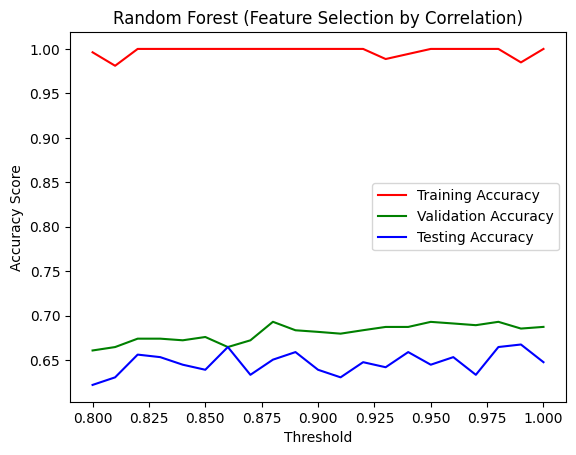

In [47]:
threshold_lst = [i for i in np.arange(0.8,1.01,0.01)]
plt.plot(threshold_lst, train_accu_lst, c="red", label="Training Accuracy")
plt.plot(threshold_lst, val_accu_lst, c="green", label="Validation Accuracy")
plt.plot(threshold_lst,test_accu_lst, c="blue", label="Testing Accuracy")
plt.xlabel('Threshold')
plt.ylabel('Accuracy Score')
plt.title("Random Forest (Feature Selection by Correlation)")
plt.legend()
plt.show()

When threshold is: 0.8600, Training accuray is: 1.000, Validation accuracy is: 0.665, Testing accuracy is: 0.665 Best parameters are:  {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 150}

In [48]:
best_to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.86)]
new_X = X.drop(best_to_drop, axis=1)
new_X_train, new_X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.4, random_state=42)
rf_best = RandomForestClassifier(n_estimators=150, min_samples_leaf=1, max_depth=10, criterion="gini", max_features="sqrt")
rf_best.fit(new_X_train, y_train)
y_pred = rf_best.predict(new_X_test)

In [49]:
new_feature_scores = pd.Series(rf_best.feature_importances_, index=new_X_train.columns).sort_values(ascending=False)  #after select features by correlation
display(new_feature_scores)

rmseP_std      0.061998
rmseP_a        0.049818
melspect_a     0.049781
onset_a        0.047737
mfcc_a_0       0.040687
                 ...   
chroma_a_3     0.007085
chroma_a_2     0.006971
beats_a        0.006968
chroma_a_11    0.006806
tonnetz_a      0.006043
Length: 67, dtype: float64

Feature Selection by correlaton & importance

In [50]:
train_accu_lst = []
test_accu_lst = []
for threshold in np.arange(0.006, 0.02, 0.0005):
  drop_features = new_feature_scores[new_feature_scores<threshold].index.tolist()
  X_drop = new_X.drop(drop_features, axis=1)
  X_train_drop, X_test_drop, y_train, y_test = train_test_split(X_drop, y, test_size=0.4, random_state=42)
  rf_drop = RandomForestClassifier(criterion="gini", max_features="sqrt")

  #GridSearchCV
  params_rf_drop = {'n_estimators':[25,50,100,150,200],
          'max_depth': [4,6,8,10,12,14],
          'min_samples_leaf': [1,2,3,4]}
  grid_rf_drop = GridSearchCV(estimator = rf_drop,
             param_grid = params_rf_drop,
             scoring = 'accuracy',
             cv = 5,
             n_jobs = -1)
  grid_rf_drop.fit(X_train_drop, y_train)

  best_model = grid_rf_drop.best_estimator_
  best_param = grid_rf_drop.best_params_
  train_accu = grid_rf_drop.best_score_

  y_pred = best_model.predict(X_test_drop)
  test_accu = accuracy_score(y_test, y_pred)

  train_accu_lst.append(train_accu)
  test_accu_lst.append(test_accu)

  print("When threshold is: {:.4f}, the training accuracy is: {:.4f}, the testing accuracy is: {:.3f}".format(threshold, train_accu, test_accu), "Best parameters are: ", best_param)

When threshold is: 0.0060, the training accuracy is: 0.6685, the testing accuracy is: 0.659 Best parameters are:  {'max_depth': 14, 'min_samples_leaf': 2, 'n_estimators': 100}
When threshold is: 0.0065, the training accuracy is: 0.6723, the testing accuracy is: 0.616 Best parameters are:  {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 200}
When threshold is: 0.0070, the training accuracy is: 0.6780, the testing accuracy is: 0.639 Best parameters are:  {'max_depth': 12, 'min_samples_leaf': 1, 'n_estimators': 200}
When threshold is: 0.0075, the training accuracy is: 0.6741, the testing accuracy is: 0.648 Best parameters are:  {'max_depth': 12, 'min_samples_leaf': 2, 'n_estimators': 50}
When threshold is: 0.0080, the training accuracy is: 0.6780, the testing accuracy is: 0.639 Best parameters are:  {'max_depth': 12, 'min_samples_leaf': 3, 'n_estimators': 50}
When threshold is: 0.0085, the training accuracy is: 0.6836, the testing accuracy is: 0.642 Best parameters are:  {'max_de

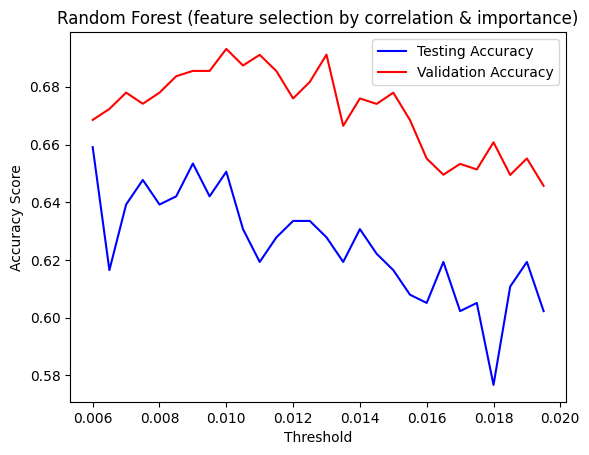

In [52]:
threshold_lst = [i for i in np.arange(0.006, 0.02, 0.0005)]
plt.plot(threshold_lst,test_accu_lst,color="blue",label="Testing Accuracy")
plt.plot(threshold_lst, train_accu_lst,color="red",label="Validation Accuracy")
plt.xlabel('Threshold')
plt.ylabel('Accuracy Score')
plt.title("Random Forest (feature selection by correlation & importance)")
plt.legend()
plt.show()

No significant improvement

### Final Model

In [58]:
final_features_drop = ['beats_a', 'chroma_std_5', 'mfcc_std_6', 'rmseP_kurtosis', 'chroma_a_1', 'mfcc_std_3', 'chroma_std_10', 'mfcc_a_9', 'rmseH_kurtosis', 'chroma_std_2', 'rmseP_skew', 'chroma_std_1', 'chroma_std_9', 'chroma_a_9', 'chroma_a_3', 'beats_std', 'chroma_a_0', 'chroma_std_3', 'chroma_std_6', 'chroma_a_10', 'mfcc_std_8', 'chroma_a_2', 'mfcc_std_1', 'rmseH_skew', 'chroma_a_11', 'tonnetz_a']
X_final = X.drop(final_features_drop, axis=1)
X_train_final, X_test_final, y_train, y_test = train_test_split(X_final, y, test_size=0.4, random_state=42)
rf_final = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=1, criterion="gini", max_features="sqrt")
rf_final.fit(X_train_final,y_train)
y_train_pred = rf_final.predict(X_train_final)
train_accuracy = accuracy_score(y_train, y_train_pred)
pred_y = rf_final.predict(X_test_final)
test_accuracy = accuracy_score(y_test, pred_y)
print("Final Model: ", "Training accuracy: {:.3f}, Testing accuracy: {:.3f}".format(train_accuracy, test_accuracy))

Final Model:  Training accuracy: 1.000, Testing accuracy: 0.653


In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

       blues       0.56      0.66      0.61        50
   classical       0.93      0.98      0.95        41
       disco       0.59      0.75      0.66        44
  electronic       0.64      0.46      0.53        50
      hiphop       0.67      0.60      0.63        47
        jazz       0.81      0.64      0.71        39
         pop       0.44      0.50      0.47        34
        rock       0.67      0.66      0.67        47

    accuracy                           0.65       352
   macro avg       0.66      0.66      0.65       352
weighted avg       0.66      0.65      0.65       352



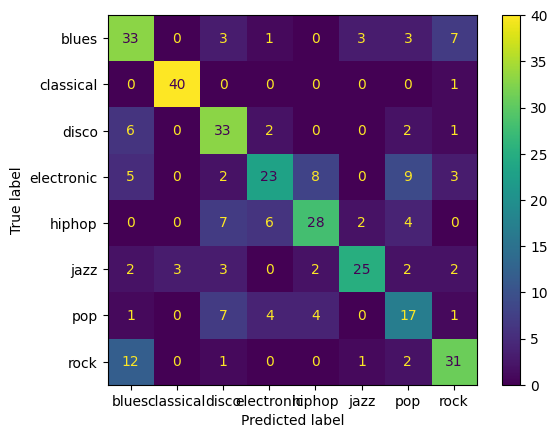

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_mat = confusion_matrix(y_test, pred_y)
ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=rf_best.classes_).plot()